# Tips on loading WAV files in Python
### Libraries
- SoundFile [https://pysoundfile.readthedocs.io/en/latest/]
- Scipy [https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html]
- Librosa [https://librosa.org/doc/latest/generated/librosa.load.html#librosa.load]
- Parselmouth [https://parselmouth.readthedocs.io/en/stable/index.html]

In [6]:
# general libraries
import numpy as np
import matplotlib.pyplot as plt
# file to test
filename = 'ang1'

### Using SoundFile:

----> SoundFile <----
By using the SoundFile lib, we have:
File: ang1 
Sampling Rate: 11025 Hz 
Duration: 3.2276 s 
Range: [-0.9795 , 0.9707]




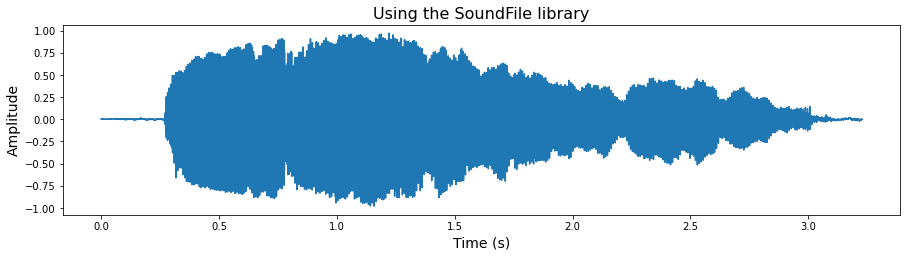

In [14]:
import soundfile as sf

# ---- Using soundfile ---- #
data_sf, samplerate_sf = sf.read(filename+'.wav') # reading the file
duration_sf = len(data_sf)/samplerate_sf          # for information
max_sf = max(data_sf)  # taking the maximum value of the signal
min_sf = min(data_sf)  # taking the minimum value of the signal
## --- informations about the file:
print('----> SoundFile <----')
print('By using the SoundFile lib, we have:')
print('File: %s \nSampling Rate: %d Hz \nDuration: %4.4f s \nRange: [%4.4f , %4.4f]\n\n' % (filename, samplerate_sf, duration_sf, min_sf, max_sf))  
t_sf = np.arange(len(data_sf))/samplerate_sf

#plotting the signal
plt.rcParams['figure.figsize'] = [15, 3.5]
plt.plot(t_sf,data_sf)
plt.title("Using the SoundFile library", fontsize = 16)
plt.xlabel("Time (s)", fontsize = 14)
plt.ylabel("Amplitude", fontsize = 14)
plt.show()

### Using Scipy:

----> Scipy <----
By using the Scipy lib, we have:
File: ang1 
Sampling Rate: 11025 Hz 
Duration: 3.2276 s 
Range: [-32097.0000 , 31807.0000]

----> Scipy, with normalization <----
Normalized Range: [-0.9796 , 0.9707]




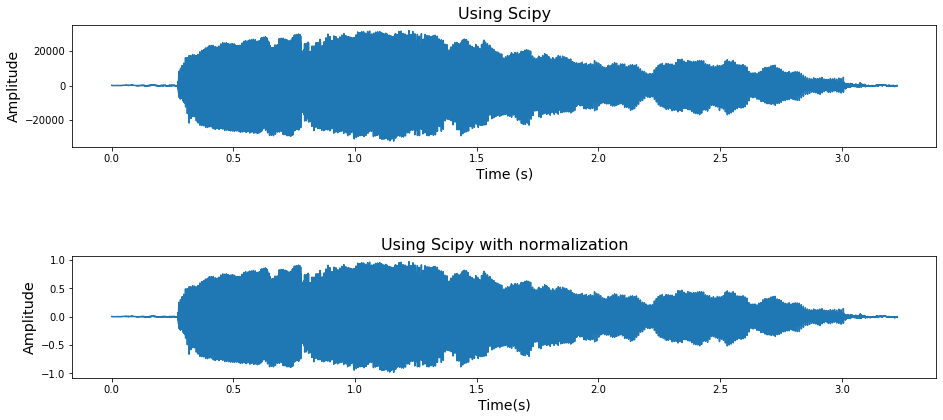

In [19]:
from scipy.io import wavfile as wf

# ---- Using scipy ---- #
samplerate_wf, data_wf  = wf.read(filename+'.wav') # reading the file
duration_wf = len(data_wf)/samplerate_wf          # for information
max_wf = max(data_wf)  # taking the maximum value of the signal
min_wf = min(data_wf)  # taking the minimum value of the signal
## --- informations about the file:
print('----> Scipy <----')
print('By using the Scipy lib, we have:')
print('File: %s \nSampling Rate: %d Hz \nDuration: %4.4f s \nRange: [%4.4f , %4.4f]\n' % (filename, samplerate_wf, duration_wf, min_wf, max_wf))  
## normalizing between [-1 , 1]:
scale_factor = (2**15)-1 # assuming  16 bits of digitalization
data_wf_norm = data_wf/scale_factor
max_wf_norm = max(data_wf_norm)  # taking the maximum value of the normalized signal
min_wf_norm = min(data_wf_norm)  # taking the minimum value of the normalized signal
print('----> Scipy, with normalization <----')
print('Normalized Range: [%4.4f , %4.4f]\n\n' % (min_wf_norm, max_wf_norm)) 

t_wf = np.arange(len(data_wf))/samplerate_wf

# Plotting the signal
fig, axs = plt.subplots(2, figsize=(15,7))
axs[0].plot(t_wf,data_wf)
axs[0].set_xlabel('Time (s)', fontsize=14)
axs[0].set_ylabel('Amplitude', fontsize=14)
axs[0].set_title('Using Scipy', fontsize = 16)
axs[1].plot(t_wf,data_wf_norm)
axs[1].set_xlabel('Time(s)', fontsize=14)
axs[1].set_ylabel('Amplitude', fontsize=14.4)
axs[1].set_title('Using Scipy with normalization', fontsize = 16)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.2,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.9)
#plt.savefig('figura5.png', dpi=300)
#plt.savefig('figura5.pdf')
plt.show()

### Using Librosa:

----> Librosa <----
By using the Librosa lib, we have:
File: ang1 
Sampling Rate: 11025 Hz 
Duration: 3.2276 s 
Range: [-0.9795 , 0.9707]




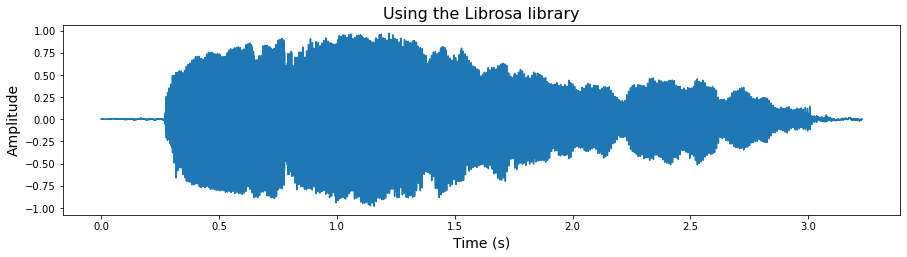

In [20]:
import librosa as rosa

# ---- Using librosa ---- #
data_rosa, samplerate_rosa = rosa.load(filename+'.wav', sr=11025) # reading the file
duration_rosa = len(data_rosa)/samplerate_rosa          # for information
max_rosa = max(data_rosa)  # taking the maximum value of the signal
min_rosa = min(data_rosa)  # taking the minimum value of the signal
## --- informations about the file:
print('----> Librosa <----')
print('By using the Librosa lib, we have:')
print('File: %s \nSampling Rate: %d Hz \nDuration: %4.4f s \nRange: [%4.4f , %4.4f]\n\n' % (filename, samplerate_rosa, duration_rosa, min_rosa, max_rosa))  
t_rosa = np.arange(len(data_rosa))/samplerate_rosa

#plotting the signal
plt.rcParams['figure.figsize'] = [15, 3.5]
plt.plot(t_rosa,data_rosa)
plt.title("Using the Librosa library", fontsize = 16)
plt.xlabel("Time (s)", fontsize = 14)
plt.ylabel("Amplitude", fontsize = 14)
plt.show()

### Using Parselmouth:

----> ParselMouth <----
By using the ParselMouth lib, we have:
File: ang1 
Sampling Rate: 11025 Hz 
Duration: 3.2276 s 
Range: [-0.9795 , 0.9707]




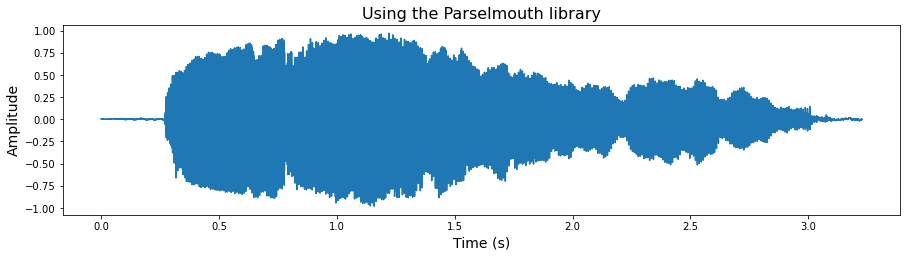

In [25]:
import parselmouth as pm

# ---- Using parselmouth ---- #
sound_pm = pm.Sound(filename+'.wav') # reading the file
data_pm = sound_pm.values
samplerate_pm = int(sound_pm.sampling_frequency)
duration_pm = len(data_pm[0])/samplerate_pm   # for information
max_pm = max(data_pm[0])  # taking the maximum value of the signal
min_pm = min(data_pm[0])  # taking the minimum value of the signal
## --- informations about the file:
print('----> ParselMouth <----')
print('By using the ParselMouth lib, we have:')
print('File: %s \nSampling Rate: %d Hz \nDuration: %4.4f s \nRange: [%4.4f , %4.4f]\n\n' % (filename, samplerate_pm, duration_pm, min_pm, max_pm))  
t_pm = np.arange(len(data_pm[0]))/samplerate_pm

#plotting the signal
plt.rcParams['figure.figsize'] = [15, 3.5]
plt.plot(t_pm,data_pm[0])
plt.title("Using the Parselmouth library", fontsize = 16)
plt.xlabel("Time (s)", fontsize = 14)
plt.ylabel("Amplitude", fontsize = 14)
plt.show()